In [1]:
#Done by SANJAY MALLASAMUDRAM SANTHANAM ; USC ID:3124715393
#part 1: PCA
import pandas as pd
import numpy as np
import math
from operator import truediv,add 
import copy

In [2]:
#read data 
data=np.loadtxt('C:/Users/Lenovo/Desktop/data.txt',delimiter="\t")

In [3]:
#Check data
np.shape(data)

(6000, 3)

In [4]:
#calculate mean
u=np.mean(data,axis=0)

In [5]:
#Value of reduced dimension as given in question
k=2

In [6]:
#Center data around mean
data=data-u

In [7]:
#Compute covariance matrix
n=np.shape(data)[1]
N=np.shape(data)[0]
E=np.zeros(shape=(n,n))
for i in range(0,N):
    E+=np.reshape(data[i],(3,1))*data[i]
E/=N

In [8]:
#Find eigenvalue and eigenvector
V,U=np.linalg.eig(E)

In [9]:
#eigenvector
U

array([[ 0.86667137, -0.4962773 , -0.0508879 ],
       [-0.23276482, -0.4924792 ,  0.83862076],
       [ 0.44124968,  0.71496368,  0.54233352]])

In [10]:
#take only necesary eigenvectors(first two as k=2) and leave rest of the eigenvectors.
U=U[:,0:k]

In [11]:
print("Direction:")
U

Direction:


array([[ 0.86667137, -0.4962773 ],
       [-0.23276482, -0.4924792 ],
       [ 0.44124968,  0.71496368]])

In [12]:
#Correesponding eigenvalues
print("Corresponding eigenvalues:")
V[0:k]

Corresponding eigenvalues:


array([101.60286375,  19.89589866])

In [13]:
z=U.T.dot(np.transpose(data))

In [14]:
print("New data points:")
z.T

New data points:


array([[ 10.87667009,   7.37396173],
       [-12.68609992,  -4.24879151],
       [  0.43255106,   0.26700852],
       ...,
       [ -2.92254009,   2.41914881],
       [ 11.18317124,   4.20349275],
       [ 14.2299014 ,   5.64409544]])

In [15]:
#library function 
from sklearn.decomposition import IncrementalPCA

In [16]:
data=np.loadtxt('C:/Users/Lenovo/Desktop/data.txt',delimiter="\t")

In [17]:
#use library function to find transformed data
pca = IncrementalPCA(n_components=k)
#fit data
pca.fit(data)
#map data from 3D to 2D
Z=pca.transform(data)

In [18]:
print("New data points from library function:")
Z

New data points from library function:


array([[ 10.87702383,   7.36575086],
       [-12.68565055,  -4.2656881 ],
       [  0.43247706,   0.26959768],
       ...,
       [ -2.92251403,   2.41954659],
       [ 11.18319958,   4.20450064],
       [ 14.23036055,   5.63145537]])

In [19]:
"""
It can be seen that the coordinates of the new points matches exactly with the one calculatedd by the Library function.
The runtime of the program can be decreased if we use matrix multiplication instead of using for loop for summation while 
calculating Covariance matrix
"""

'\nIt can be seen that the coordinates of the new points matches exactly with the one calculatedd by the Library function.\nThe runtime of the program can be decreased if we use matrix multiplication instead of using for loop for summation while \ncalculating Covariance matrix\n'

In [31]:
#Done by SANJAY MALLASAMUDRAM SANTHANAM ; USC ID:3124715393
#part 2: Fastmap
import pandas as pd
import numpy as np
import math
from operator import truediv,add 
import copy

In [32]:
#read data 
data=np.loadtxt('C:/Users/Lenovo/Desktop/fastmap_data.txt',delimiter="\t")

In [33]:
#Read list of words from txt file
wordlist=[]
with open('C:/Users/Lenovo/Desktop/fastmap_wordlist.txt') as single:
    single=single.readlines()
    wordlist=(single)

In [34]:
#clean data by removing newline character at the end and separate all words
for i in range(0,len(wordlist)):
    wordlist[i]=wordlist[i].split('\n')[0]

In [35]:
wordlist

['acting',
 'activist',
 'compute',
 'coward',
 'forward',
 'interaction',
 'activity',
 'odor',
 'order',
 'international']

In [36]:
#n= no of words=10 
n=len(wordlist)
#D represents the distance matrix which contains all initial distances between all pairs. It is symmetric
D=np.zeros((n,n))

#for each pair, update in 2 cells of the matrix. 
for t in data:
    D[int(t[0])-1][int(t[1])-1]=t[2]
    D[int(t[1])-1][int(t[0])-1]=t[2]

In [37]:
D

array([[ 0.,  4.,  7.,  6.,  7.,  7.,  4.,  6.,  6., 10.],
       [ 4.,  0.,  7.,  7.,  8.,  9.,  2.,  8.,  8., 11.],
       [ 7.,  7.,  0.,  5.,  6., 10.,  6.,  6.,  6., 12.],
       [ 6.,  7.,  5.,  0.,  2., 10.,  7.,  4.,  5., 12.],
       [ 7.,  8.,  6.,  2.,  0., 10.,  8.,  5.,  4., 11.],
       [ 7.,  9., 10., 10., 10.,  0.,  9., 10.,  9.,  4.],
       [ 4.,  2.,  6.,  7.,  8.,  9.,  0.,  8.,  8., 11.],
       [ 6.,  8.,  6.,  4.,  5., 10.,  8.,  0.,  2., 12.],
       [ 6.,  8.,  6.,  5.,  4.,  9.,  8.,  2.,  0., 11.],
       [10., 11., 12., 12., 11.,  4., 11., 12., 11.,  0.]])

In [38]:
#k-dimension of transformed data = 2 as given in question
k=2
#p is array of all 'k' dimensional transformed data points .Initially it is assigned zero
p=np.zeros((n,k))


In [39]:
#iterate once for each dimension of the transformed data
for it in range(0,k):
    #farthest pair calculation.Initially Oa is set to 0 and Ob is chosen randomnly.Distance values are compared using
    #square values because 1)it saves time spent in calculating square root value, which is actual distance 2) Comparing 
    #square distances instead of actual distance values  wont change the result.
    Oa=0
    #set Ob randomnly
    Ob=np.random.randint(low=0 ,high=n-1)
    #distance btwn 2 points is initial distance minus distance between all lower coordinates. 
    max_dis=D[Oa][Ob]**2
    #p is a n*k matrix which contains coordinates of all points and all dimensions. For iteration it, we take into considerations
    # iterations 0 to iterations it-1 only. 
    for j in range(0,it):
        max_dis-=(p[Oa][j]-p[Ob][j])**2
    #Use heuristic method to find max distance between pairs.The iteration process is run 35 times so that the chances of 
    #choosing a sub optimal solution is reduced. 
    #In each iteration, Ob and Oa is updated once. i.e. given some  (Oa,Ob), first a new value of Oa say Oa' is found.
    #Now given this (Oa',Ob), a new value for Ob is found say Ob'. So both pair values are updated in 1 iteration itself.
    #On running 35 iterations, 70 times the coordinates are tested.
    #Loop through all n points to find max dist btwn a fixed coordinate and the new coordinate.
    for _ in range(0,35):
        #Fix Ob and find farthest point pt from Ob and assign it as Oa  
        for pt in range(0,n):
            #Initial Old distance
            t=D[Ob][pt]**2
            #New Distance
            for j in range(0,it):
                t-=(p[Ob][j]-p[pt][j])**2
            if(t>max_dis):
                Oa=pt
                max_dis=t
            #print("Ob:",Ob," pt:",pt," Dist:",t)    
        #Fix Oa and find farthest point pt from Oa and assign it as Ob        
        for pt in range(0,n):
            t=D[Oa][pt]**2
            for j in range(0,it):
                t-=(p[Oa][j]-p[pt][j])**2
            if(t>max_dis):
                Ob=pt
                max_dis=t
            #print("Oa:",Oa," pt:",pt," Dist:",t)   
    #after determining the farthest pait, now iterate through every point and find their coordinates.            
    print("\nFarthest pair:",Oa,Ob,"\n","Max distance between farthest pair:",math.pow(max_dis,0.5),"\n")
    for i in range(0,n):
        #Distance calculations
        x1=D[Oa][i]**2
        x2=D[Oa][Ob]**2
        x3=D[i][Ob]**2
        for j in range(0,it):
            x1-=(p[Oa][j]-p[i][j])**2
            x2-=(p[Oa][j]-p[Ob][j])**2
            x3-=(p[Ob][j]-p[i][j])**2
            
        p[i][it]=(x1+x2-x3)/(2*np.sqrt(x2))
        
        


Farthest pair: 9 2 
 Max distance between farthest pair: 12.0 


Farthest pair: 6 4 
 Max distance between farthest pair: 8.0 



In [40]:
#Note: Distance can be calculated from either one of Oa or Ob. Both gives different but symmetric results. 
print("Points in ",k," dimensions are:")
p

Points in  2  dimensions are:


array([[ 8.125     ,  1.9375    ],
       [ 9.        ,  0.25      ],
       [12.        ,  4.        ],
       [10.95833333,  6.8125    ],
       [ 9.54166667,  8.        ],
       [ 2.5       ,  2.8125    ],
       [ 9.54166667,  0.        ],
       [10.5       ,  6.4375    ],
       [ 9.54166667,  7.        ],
       [ 0.        ,  4.        ]])

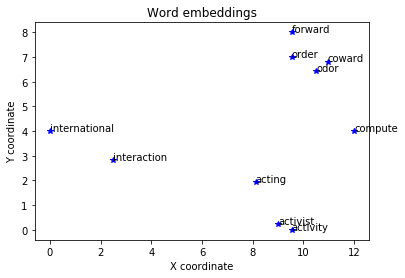

None


In [41]:
#plot graph.
import matplotlib.pyplot as plt
figure,axis = plt.subplots()
#title
plt.title("Word embeddings")
#label of x axis
plt.xlabel("X coordinate")
#label of y axis
plt.ylabel("Y coordinate")
#plot each point
for pt in range(0,n):
    axis.plot(p[pt][0],p[pt][1],'b*')
    #show words along with point
    axis.annotate(wordlist[pt],(p[pt][0],p[pt][1]))
print(plt.show())